<a href="https://colab.research.google.com/github/vivekpenuli/Tensorflow/blob/master/Tensor_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x


TensorFlow 1.x selected.


In [2]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
print(tf.__version__)

1.15.2


In [4]:
x_data=np.linspace(1,11,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([ 0.12701875,  2.04296719,  3.09510925,  4.25879828,  5.71474864,
        7.23589869,  6.40967922,  9.80218541, 10.73835825,  9.53670499])

In [5]:
y_label=np.linspace(1,10,10) + np.random.uniform(-1.5,1.5,10)
y_label

array([-0.08425892,  3.37767422,  2.91015144,  5.46564172,  6.21622633,
        7.19958421,  8.24099764,  8.28251304,  7.61554298,  8.50027043])

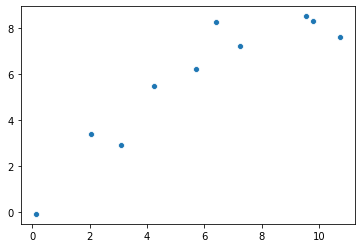

In [6]:
ax = sns.scatterplot(x=x_data, y=y_label)

In [7]:
weight=tf.Variable(initial_value=0.1)
bias=tf.Variable(initial_value=0.01)

In [8]:
xph=tf.placeholder(tf.float32)
yph=tf.placeholder(tf.float32)
n = len(x_data)
print(n)

10


In [9]:
y_pred = tf.add(tf.multiply(xph, weight), bias) 

In [10]:
mse=(tf.pow(tf.math.subtract(y_pred,yph), 2)) / (2 * n) 

In [11]:
optimiser=tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(mse)
init=tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [30]:
learning_rate = 0.001
epochs =1000

In [31]:

with tf.Session() as sess:       
    sess.run(init) # first step variable initaliser

    for epoch in range(epochs):
        for (_x, _y) in zip(x_data, y_label): 
            sess.run(optimiser,feed_dict = {xph : _x, yph : _y}) 
    we= sess.run(weight) 
    bi = sess.run(bias) 
    


# MSE
the mse is calculated through predicted values and y actual value

In [32]:
predictions=tf.add(tf.multiply(we,x_data), bi) 

In [33]:

init=tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  op=sess.run(predictions)
  print(op)

[0.50404507 2.1687298  3.0828903  4.0939693  5.358982   6.680643
 5.962777   8.910378   9.72378    8.679715  ]


In [34]:
mse11=(tf.pow(tf.math.subtract(predictions,y_label), 2)) / (2 * n) 

In [35]:
init=tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  opp=sess.run(mse11)
  print(opp)
  super=opp.sum()

[0.01730508 0.07307732 0.00149193 0.09407423 0.03674337 0.01346498
 0.25951436 0.01971077 0.22223313 0.00161001]


In [36]:
print("Training cost =",super, "Weight =", we, "bias =", bi, '\n')

Training cost = 0.7392252 Weight = 0.8688567 bias = 0.393684 



In [37]:
print(predictions)

Tensor("Add_3:0", shape=(10,), dtype=float32)


[0.50404507 2.1687298  3.0828903  4.0939693  5.358982   6.680643
 5.962777   8.910378   9.72378    8.679715  ]


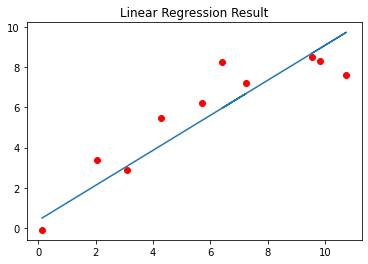

In [38]:
with tf.Session() as sess:
  sess.run(init)
  sp=sess.run(predictions)
  print(sp)
  plt.plot(x_data, y_label, 'ro', label ='Original data') 
  plt.plot(x_data, sp, label ='Fitted line') 
  plt.title('Linear Regression Result') 
